# Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit.csv to credit.csv


In [ ]:
data = pd.read_csv('credit.csv')
df = pd.DataFrame(data)

## Data Visualization

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


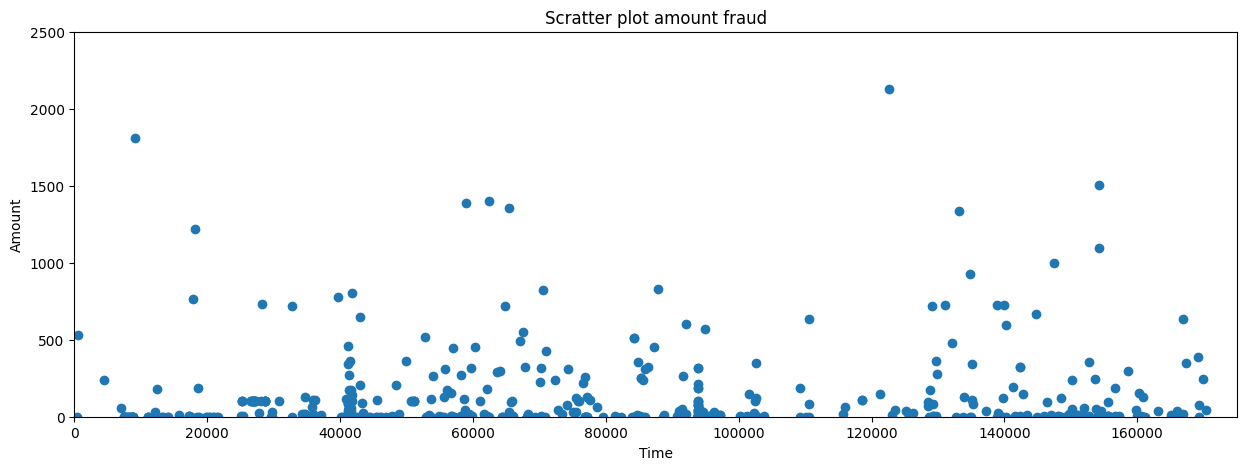

In [ ]:
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [ ]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only {} frauds where the amount was bigger than 1000 over {} frauds'.format(str(nb_big_fraud),str(df_fraud.shape[0]) ))

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


## Unbalanced Data

In [ ]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only {}  frauds in the original dataset, even though there are {} no frauds in the dataset.'.format(str(number_fraud),str(number_no_fraud)))

There are only 492  frauds in the original dataset, even though there are 284315 no frauds in the dataset.


In [ ]:
print("The accuracy of the classifier then would be : {} which is the number of good classification over the number of tuple to classify".format(str((284315-492)/284315)))

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


## Correlation of the features

In [ ]:
df_corr = df.corr() # Pearson, Standard Correlation Coefficient

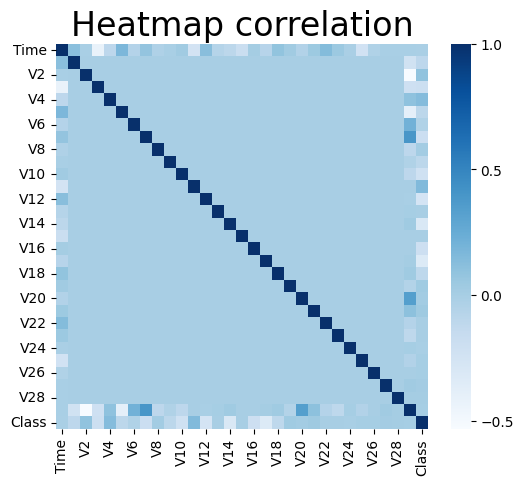

In [ ]:
plt.figure(figsize=(6,5))
seaborn.heatmap(df_corr, cmap='Blues')
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

## Data Selection

### UNDERSAMPLING

In [ ]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
# Separate dataset into training set
df_train_all = df[0:150000]

# Separate fraud and non-fraud cases
df_train_1 = df_train_all[df_train_all['Class'] == 1]  # Fraud cases
df_train_0 = df_train_all[df_train_all['Class'] == 0]  # Non-fraud cases

# Display number of fraud cases
print(f'In this dataset, we have {len(df_train_1)} frauds, so we need to take a similar number of non-fraud cases.')

# Under-sample non-fraud cases
df_sample = df_train_0.sample(len(df_train_1))

# Combine frauds and under-sampled non-fraud cases and shuffle the dataset
df_train = pd.concat([df_train_1, df_sample]).sample(frac=1).reset_index(drop=True)


In this dataset, we have 293 frauds, so we need to take a similar number of non-fraud cases.


In [ ]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
# with all the test dataset to see if the model learn correctly
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

## Fucntion for Confusion Matrix

In [ ]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [100]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression()

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Decrease regularization strength
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', C=0.1)
clf = OneVsRestClassifier(log_reg)

# Fit the model
clf.fit(X_train, y_train)


OneVsRestClassifier(estimator=LogisticRegression(C=0.1, max_iter=1000))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Class', axis=1), df_train['Class'], test_size=0.2, random_state=42)

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='saga')))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.97      0.92        61
           1       0.96      0.86      0.91        57

    accuracy                           0.92       118
   macro avg       0.92      0.91      0.91       118
weighted avg       0.92      0.92      0.91       118



In [101]:
new_var = classifier.fit(X_train, y_train)

In [ ]:
# Loop through each classifier in the OneVsRestClassifier
for idx, estimator in enumerate(classifier.estimators_):
    print(f"Class {idx}:")
    print(f"Intercept: {estimator.intercept_}")
    print(f"Coefficients: {estimator.coef_}")
    print("\n")


Class 0:
Intercept: [-0.20466984]
Coefficients: [[-3.81150999e-05  3.18007346e-01  6.46863992e-02 -3.87301463e-01
   5.02032842e-01  2.86252290e-01 -1.20753954e-01  1.24076199e-01
  -4.05629857e-01 -2.07183340e-01 -5.74908287e-01  3.65583041e-01
  -4.05619389e-01 -3.08218653e-01 -1.24758051e+00 -1.48274523e-01
  -1.75985054e-01 -8.77346690e-02  1.43655768e-01 -1.63583488e-01
  -5.92544202e-02  1.05406676e-01  8.11128834e-02  3.01730056e-02
  -1.71691392e-02  2.97651942e-02 -5.67292122e-02  3.38758822e-02
   2.85252081e-02 -5.08016143e-04]]




In [ ]:
intercepts = []
coefficients = []

# Collect intercepts and coefficients for each class
for estimator in classifier.estimators_:
    intercepts.append(estimator.intercept_)
    coefficients.append(estimator.coef_)

# Now `intercepts` and `coefficients` contain the values for all classes


In [ ]:
pred = classifier.predict(X_train)

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.9487179487179487


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
# n_classes = 3
# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression())
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# ... (rest of the code remains the same)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Initialize Logistic Regression with increased max_iter
log_reg = LogisticRegression(max_iter=10000, solver='lbfgs')  # You can try other solvers as well

# Wrap with OneVsRestClassifier
classifier = OneVsRestClassifier(log_reg)

# Fit the model
classifier.fit(X_train, y_train)

# Get decision scores
y_score = classifier.decision_function(X_test)


In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='lbfgs')))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Get decision scores
y_score = pipeline.decision_function(X_test)


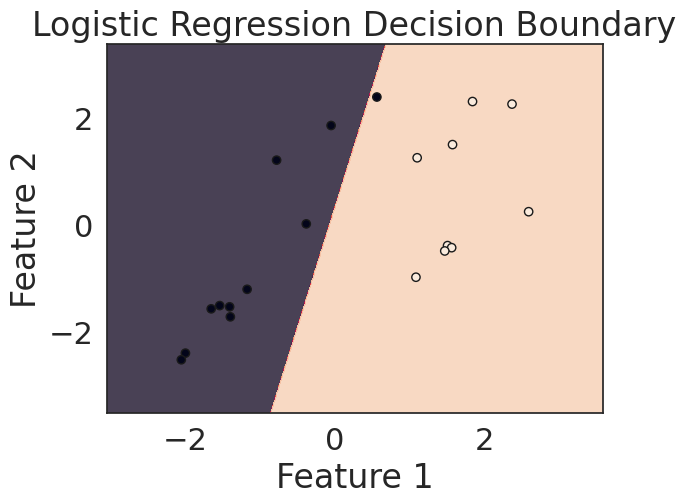

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate a toy dataset for binary classification
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    # Define the grid range
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and regions
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_test, y_test, model)


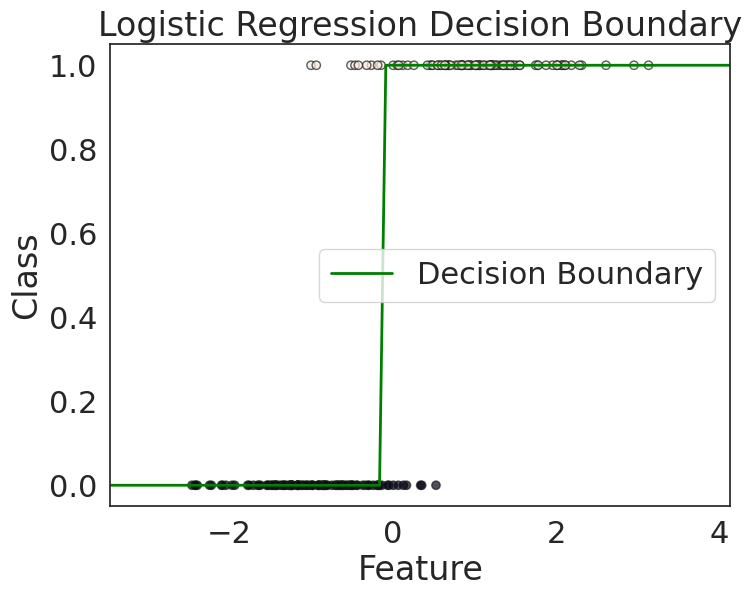

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset for binary classification
X, y = make_classification(
    n_samples=1000,
    n_features=1,
    n_classes=2,
    n_informative=1,
    n_redundant=0,
    n_clusters_per_class=1,  # Set to 1 to satisfy the condition
    random_state=42
)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    # Define the grid range
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx = np.linspace(x_min, x_max, 100).reshape(-1, 1)

    # Predict over the grid
    Z = model.predict(xx)

    # Plot the decision boundary and regions
    plt.figure(figsize=(8, 6))
    plt.plot(xx, Z, color='green', linewidth=2, label='Decision Boundary')
    plt.scatter(X[:, 0], y, c=y, edgecolors='k', marker='o', alpha=0.7)
    plt.xlim(xx.min(), xx.max())
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature")
    plt.ylabel("Class")
    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_test, y_test, model)


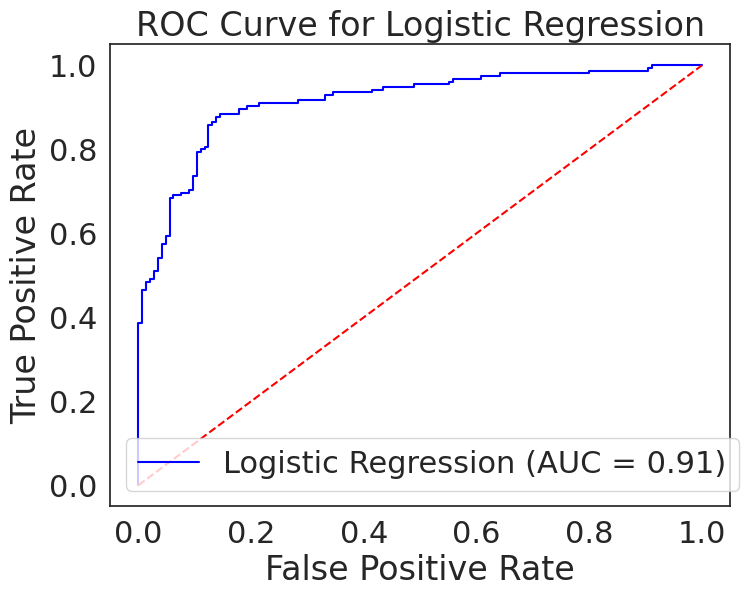

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

# Generate a toy dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob):.2f})", color="blue")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title("ROC Curve for Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


### Confusion Matrix

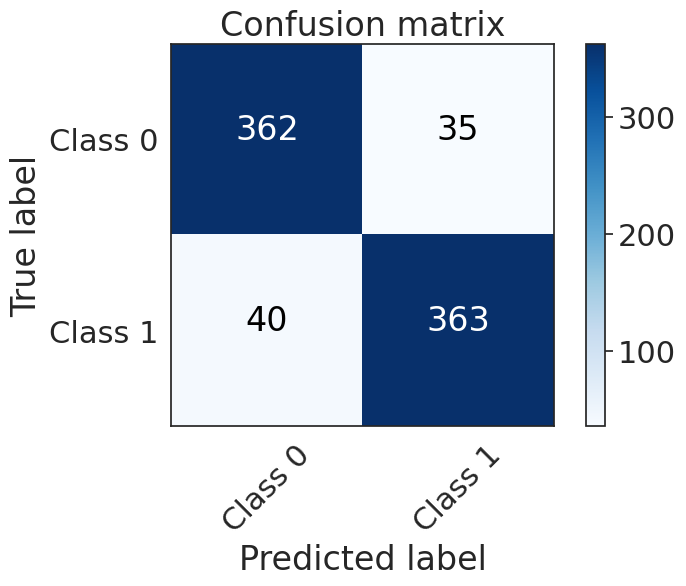

In [ ]:
pred = model.predict(X_train)  # Generate predictions using the training data

cm = confusion_matrix(y_train, pred)
plot_confusion_matrix(cm, class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [ ]:
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,r2_score
report= classification_report(y_train,pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       397
           1       0.91      0.90      0.91       403

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



In [ ]:
mean_abs_error = mean_absolute_error(y_train,pred)
mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))
mse= mean_squared_error(y_train,pred)
r_squared_error = r2_score(y_train,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,r_squared_error))

Mean absolute error : 0.09375 
Mean Absolute Percentage error : 0.05
Mean Squared Error : 0.09375
R Squared Error: 0.6249789050634098


<ipython-input-65-5f72e4baadad>:2: RuntimeWarning: divide by zero encountered in floor_divide
  mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))


# Undersampling using Synthetic Minority Oversampling Technique (SMOTE) approach

In [105]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_train,y_train= oversample.fit_resample(X_train,y_train)

## Applying Logistic Regression

In [106]:
classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=10000))

In [ ]:
for estimator in classifier.estimators_:
    print("Intercept:", estimator.intercept_)
    print("Coefficients:", estimator.coef_)

Intercept: [0.30296507]
Coefficients: [[3.59520847]]


In [ ]:
pred = classifier.predict(X_train)

In [ ]:
print ('Accuracy from sk-learn after applying SMOTE: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn after applying SMOTE: 0.9069478908188585


## Confusion Matrix

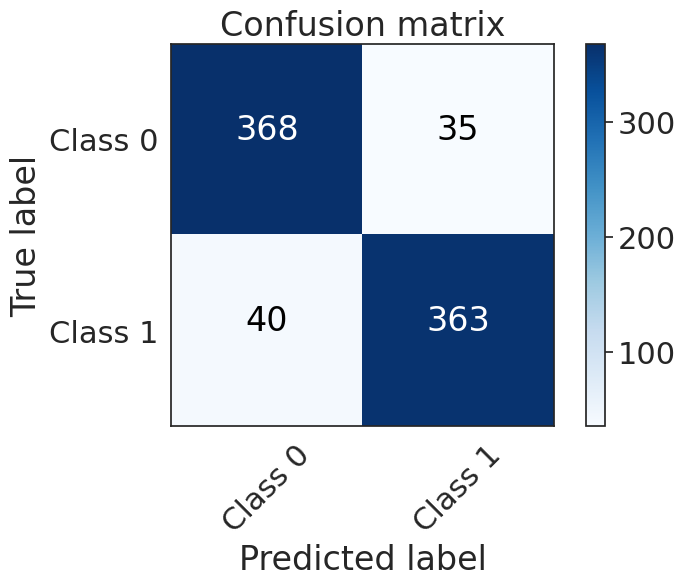

In [ ]:
cm = confusion_matrix(y_train, pred)
plot_confusion_matrix(cm,class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [ ]:
report= classification_report(y_train,pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       403
           1       0.91      0.90      0.91       403

    accuracy                           0.91       806
   macro avg       0.91      0.91      0.91       806
weighted avg       0.91      0.91      0.91       806



In [ ]:
mean_abs_error = mean_absolute_error(y_train,pred)
mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))
mse= mean_squared_error(y_train,pred)
r_squared_error = r2_score(y_train,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,r_squared_error))

Mean absolute error : 0.09305210918114144 
Mean Absolute Percentage error : 0.04962779156327544
Mean Squared Error : 0.09305210918114144
R Squared Error: 0.6277915632754343


<ipython-input-75-5f72e4baadad>:2: RuntimeWarning: divide by zero encountered in floor_divide
  mean_abs_percentage_error = np.mean(np.abs((y_train - pred) // y_train))


## Testing Error

In [110]:
pred = classifier.predict(X_test_all[:, :2])

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_test,y_test)))

Accuracy from sk-learn: 0.91


### Confusion Matrix

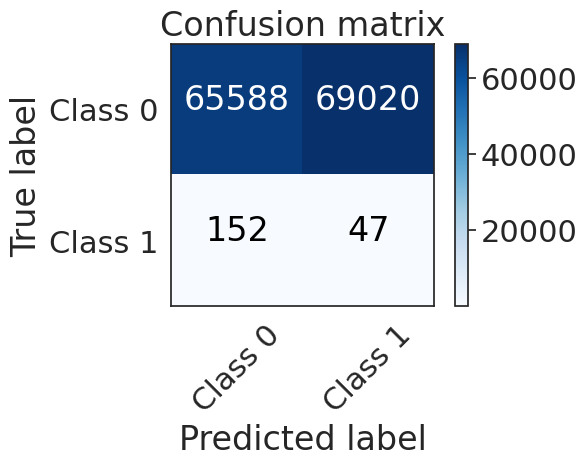

In [112]:
cm = confusion_matrix(y_test_all, pred)
plot_confusion_matrix(cm,class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [113]:
report= classification_report(y_test_all,pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.49      0.65    134608
           1       0.00      0.24      0.00       199

    accuracy                           0.49    134807
   macro avg       0.50      0.36      0.33    134807
weighted avg       1.00      0.49      0.65    134807



In [114]:
mean_abs_error = mean_absolute_error(y_test_all,pred)
mean_abs_percentage_error = np.mean(np.abs((y_test_all - pred) // y_test_all))
mse= mean_squared_error(y_test_all,pred)
r_squared_error = r2_score(y_test_all,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,np.abs(r_squared_error)/100))

Mean absolute error : 0.5131187549607958 
Mean Absolute Percentage error : 0.0011275378874984238
Mean Squared Error : 0.5131187549607958
R Squared Error: 3.4711186728244816


<ipython-input-114-83cba60e8012>:2: RuntimeWarning: divide by zero encountered in floor_divide
  mean_abs_percentage_error = np.mean(np.abs((y_test_all - pred) // y_test_all))


## Hyperparameter Tuning

In [ ]:
classifier_b = LogisticRegression(class_weight={0:0.6,1:0.4})

In [ ]:
classifier_b.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.6, 1: 0.4})

In [116]:
pred_b = classifier_b.predict(X_test_all[:, 0].reshape(-1, 1))

In [117]:
print(classifier_b.intercept_, classifier_b.coef_)

[-0.09642479] [[3.42390854]]


In [120]:
pred_b = classifier_b.predict(X_test_all[:, 0].reshape(-1, 1))

# Similarly, when calculating the accuracy score, use only the first feature.
print ('Accuracy from sk-learn after hyperpaarameter tuning: {}'.format(classifier_b.score(X_test_all[:, 0].reshape(-1, 1),y_test_all)))

Accuracy from sk-learn after hyperpaarameter tuning: 0.46818043573404944


### Confusion Matrix

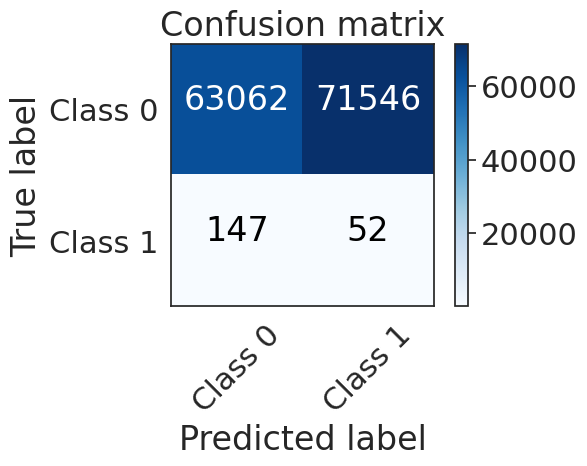

In [121]:
cm = confusion_matrix(y_test_all, pred_b)
plot_confusion_matrix(cm,class_names)

### Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [122]:
report= classification_report(y_test_all,pred_b)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.47      0.64    134608
           1       0.00      0.26      0.00       199

    accuracy                           0.47    134807
   macro avg       0.50      0.36      0.32    134807
weighted avg       1.00      0.47      0.64    134807



In [123]:
mean_abs_error = mean_absolute_error(y_test_all,pred_b)
mean_abs_percentage_error = np.mean(np.abs((y_test_all - pred_b) // y_test_all))
mse= mean_squared_error(y_test_all,pred_b)
r_squared_error = r2_score(y_test_all,pred_b)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,np.abs(r_squared_error)/100))

Mean absolute error : 0.5318195642659506 
Mean Absolute Percentage error : 0.0010904478254096597
Mean Squared Error : 0.5318195642659506
R Squared Error: 3.5979893744695186


<ipython-input-123-89142672760e>:2: RuntimeWarning: divide by zero encountered in floor_divide
  mean_abs_percentage_error = np.mean(np.abs((y_test_all - pred_b) // y_test_all))
